Perceptron

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import random as rnd

predefined_w = [0.1, 0.3, 0.6]


In [ ]:
#-------------------------------------------------------------------------------
# Function to plot the decision boundary in 2D space
# Params:
# w_trained: model is a (d+1) dimensional vector, first dimension is for the bias term
# X: dataset is a Nx(d+1) matrix, first dimension is 1 for the bias term
# y: output is an N dimensional vector, negative class is denoted by -1 and positive class is denoted by 1
def plot_2D_decision_boundary(w, X, y):
    
    # Extract positive and negative points   
    positive_points = X[y == 1, 1:] 
    negative_points = X[y == -1, 1:]
    
    # create a new figure.
    plt.figure(1, figsize=(10, 8))
    
    # get max value
    x_max = np.amax(X)
    y_max = x_max
    
    # get min value
    x_min = np.amin(X)
    y_min = x_min

    # slightly increases the plot area.
    x_limit = (x_min - 0.5, x_max + 0.5)
    y_limit = (y_min - 0.5, y_max + 0.5)

    # Plot positive and negative points  
    plt.plot(positive_points[:, 0], positive_points[:, 1], "bo", markersize=3, label='positive class')
    plt.plot(negative_points[:, 0], negative_points[:, 1], "rs", markersize=3, label='negative class')

    # the points on the hyperplane, in the plot space.
    line_x = np.linspace(x_limit[0], x_limit[1], 50)
    # Calculate line_y using below
    # w0 + w1*x + w2*y = 0

    # plot the hyperplane. line x den x değerlerine göre y değerlerini cek
    line_y =((-1*(w[0] + w[1]*line_x))/w[2])
    plt.plot(line_x, line_y, "b")

    # adjust the plot area.
    plt.xlim(x_limit[0], x_limit[1])
    plt.ylim(y_limit[0], y_limit[1])

    # add axis label and title, and pop out the figure.
    plt.xlabel("x1")
    plt.ylabel("x2")    
    plt.show()
    return 

In [ ]:

#-------------------------------------------------------------------------------
# Function to plot the decision boundary in 2D space
# Params:
# w_trained: model is a (d+1) dimensional vector, first dimension is for the bias term
# X: dataset is a Nx(d+1) matrix, first dimension is 1 for the bias term
# y: output is an N dimensional vector, negative class is denoted by -1 and positive class is denoted by 1
def plot_2_line(w_predefined, w_trained, X, y):
    
    # Extract positive and negative points   
    positive_points = X[y == 1, 1:] 
    negative_points = X[y == -1, 1:]
    
    # create a new figure.
    plt.figure(1, figsize=(10, 8))
    
    # get max value
    x_max = np.amax(X)
    y_max = x_max
    
    # get min value
    x_min = np.amin(X)
    y_min = x_min


    # slightly increases the plot area.
    x_limit = (x_min - 0.5, x_max + 0.5)
    y_limit = (y_min - 0.5, y_max + 0.5)

    # Plot positive and negative points  
    plt.plot(positive_points[:, 0], positive_points[:, 1], "bo", markersize=3, label='positive class')
    plt.plot(negative_points[:, 0], negative_points[:, 1], "rs", markersize=3, label='negative class')

    # the points on the hyperplane, in the plot space.
    line_x = np.linspace(x_limit[0], x_limit[1], 50)
    # Calculate line_y using below
    # w0 + w1*x + w2*y = 0

    # plot the hyperplane. line x den x değerlerine göre y değerlerini cek
    line_predefined =((-1*(w_predefined[0] + w_predefined[1]*line_x))/w_predefined[2])
    plt.plot(line_x, line_predefined, "b", color="blue")
    
    line_trained =((-1*(w_trained[0] + w_trained[1]*line_x))/w_trained[2])
    plt.plot(line_x, line_trained, "b", color="red")

    # adjust the plot area.
    plt.xlim(x_limit[0], x_limit[1])
    plt.ylim(y_limit[0], y_limit[1])

    # add axis label and title, and pop out the figure.
    plt.xlabel("x1")
    plt.ylabel("x2")    
    plt.show()
    return 


In [ ]:

#-------------------------------------------------------------------------------
# Function for Perceptron Learning Algorithm
# Params:
# X: dataset is a Nx(d+1) matrix, first dimension is 1 for the bias term
# y: output is an N dimensional vector, negative class is denoted by -1 and positive class is denoted by 1
# return:
# w_trained: model is a (d+1) dimensional vector, first dimension is for the bias term

def train_perceptron(X, y):
        
    # we start with the w values below : 
    w_trained = [0.07, 0.09, 0.3]
    iteration = 0
    is_converged = False
    
    while is_converged is False: 
                
        y_predicted = np.sign(np.dot(X, w_trained))  
                
        equality_of_indices = np.equal(y, y_predicted)
        
        # check indis for random misclassified x
        indices = [i for i in range(len(equality_of_indices)) if equality_of_indices[i] == False]  
         
        if len(indices) > 0:
            random_misclassified = rnd.randint(0, len(indices)-1)
            w_trained +=  y[random_misclassified]*X[random_misclassified]
            iteration += 1
        else :
            is_converged = True
            print("Perceptron algorithm is converged in " , iteration , " steps.")
    
        if(iteration == 1):
            print("First Iteration Plot, with weights trained : ", w_trained)
            print("Original Line : Blue, Trained Line : Red")
            plot_2_line(predefined_w, w_trained, X, y)

    return w_trained


Data Set Size : 20


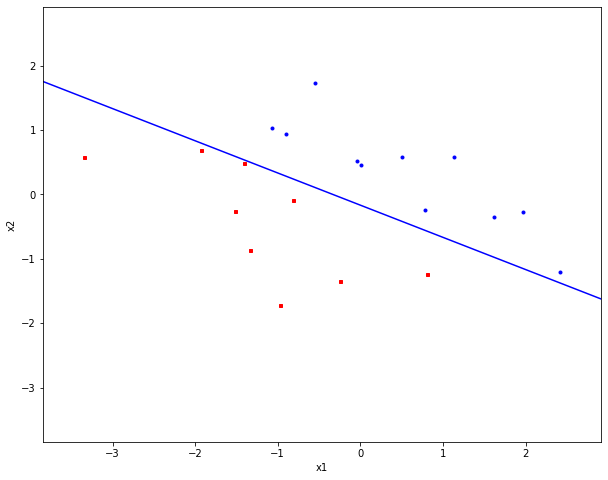

In [ ]:

# Creating Data #

# Create dataset
X_1 = np.random.randn(20,2)
X_1 = np.concatenate([np.ones([20,1]), X_1], axis=1)

# Find y values(class labels) via target function
y_1 = np.sign(np.dot(X_1, predefined_w))
print("Data Set Size : 20")
plot_2D_decision_boundary(predefined_w, X_1, y_1)


Train started !
First Iteration Plot, with weights trained :  [ 1.07       -0.98336693  1.3391394 ]
Original Line : Blue, Trained Line : Red


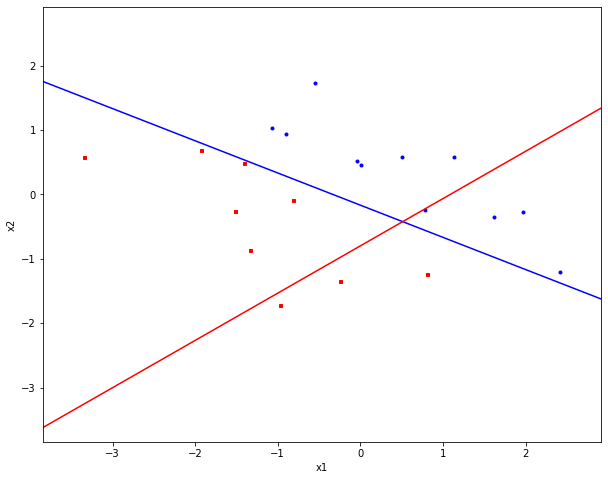

Perceptron algorithm is converged in  8  steps.
Train completed !
Original weigth vector  ( f function ) :  [0.1, 0.3, 0.6]
Learned weigth vector ( g function )   :  [2.07       4.62328654 5.90782077]
Original Line : Blue, Trained Line : Red


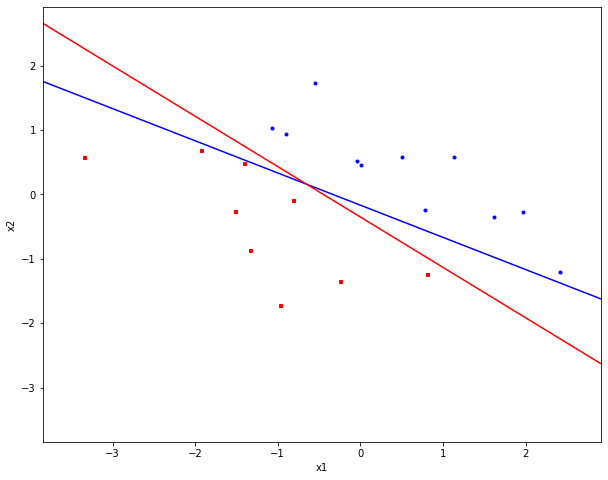

Slope of original line :  0.5
Slope of trained line  :  0.7825705480031916
Difference  :  0.2825705480031916


In [ ]:
# Training #

# Train perceptron
print("Train started !")

trained_w = train_perceptron(X_1, y_1)

print("Train completed !")
print("Original weigth vector  ( f function ) : ", predefined_w)
print("Learned weigth vector ( g function )   : ", trained_w)

print("Original Line : Blue, Trained Line : Red")
plot_2_line(predefined_w, trained_w, X_1, y_1)


#  show similarity
slope_original = predefined_w[1] / predefined_w[2]

slope_trained = trained_w[1] / trained_w[2]

difference_dimension_20 = np.absolute(slope_original - slope_trained)

print("Slope of original line : ", slope_original)
print("Slope of trained line  : ", slope_trained)
print("Difference  : ", difference_dimension_20)



COMMENTS 

Two plots could be seen above. The first one is the plot in first iteration. This line does not split the data properly, so in 8th step the data is splitted properly as in seen second plot. 

We draw our lines based on formula below :

w0 + w1*x + w2*y = 0

So, we can use w1 / w2 in order to find the slope for each line. Slope difference between slope value could inform us how much these lines close to each other. When we compare the difference with the differences in other data sets, we could say which data set is useful to create closest line. 



 Data Set Size : 100 


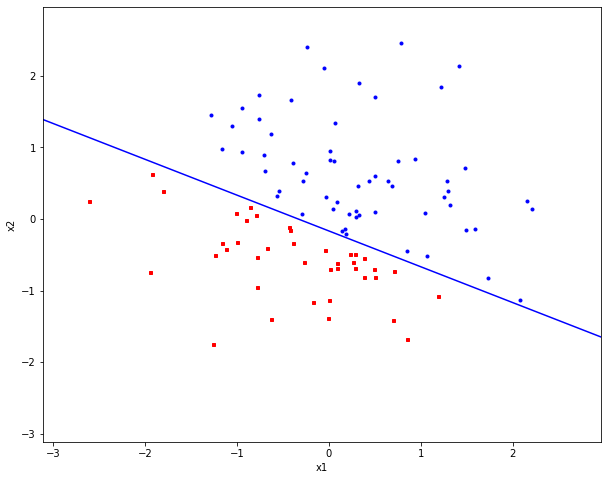

In [ ]:

# Create dataset
X_3 = np.random.randn(100,2)
X_3 = np.concatenate([np.ones([100,1]), X_3], axis=1)

# Find y values(class labels) via target function
y_3 = np.sign(np.dot(X_3, predefined_w))

print("\n Data Set Size : 100 ")
plot_2D_decision_boundary(predefined_w, X_3, y_3)



Train started !
First Iteration Plot, with weights trained :  [1.07       0.7292902  0.82755835]
Original Line : Blue, Trained Line : Red


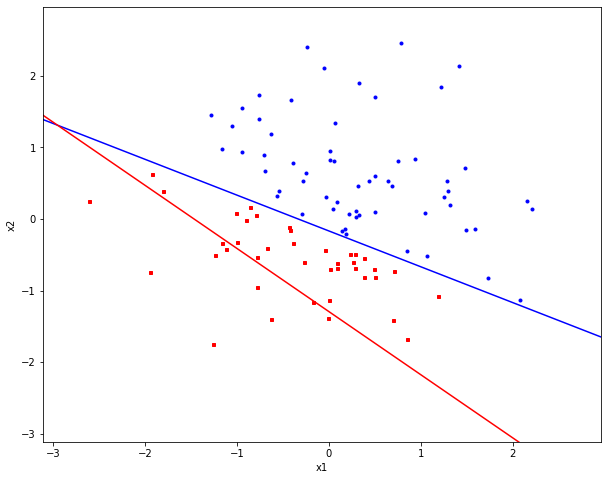

Perceptron algorithm is converged in  15  steps.
Train completed !
Original weigth vector  ( f function ) : [0.1, 0.3, 0.6]
Learned weigth vector ( g function )   :  [3.07       5.61949363 9.82502502]
Original Line : Blue, Trained Line : Red


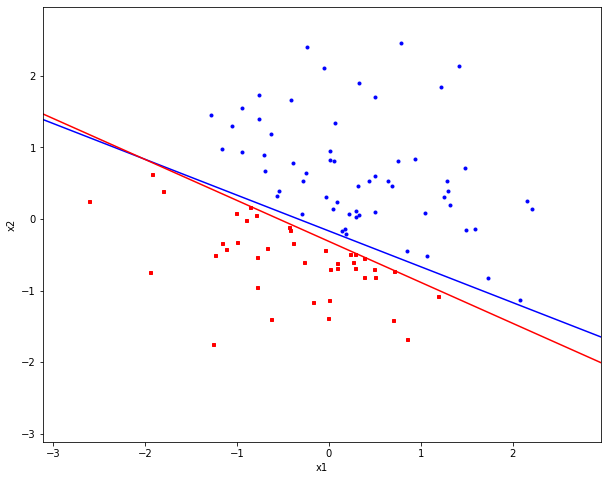

Slope of original line :  0.5
Slope of trained line  :  0.5719571830481247
Difference  :  0.0719571830481247


In [ ]:
# Train perceptron 

print("Train started !")

trained_w = train_perceptron(X_3,y_3)

print("Train completed !")
print("Original weigth vector  ( f function ) :", predefined_w)
print("Learned weigth vector ( g function )   : ", trained_w)

print("Original Line : Blue, Trained Line : Red")
plot_2_line(predefined_w, trained_w, X_3, y_3)

#  show similarity
slope_original = predefined_w[1] / predefined_w[2]

slope_trained = trained_w[1] / trained_w[2]

difference_dimension_100 = np.absolute(slope_original - slope_trained)

print("Slope of original line : ", slope_original)
print("Slope of trained line  : ", slope_trained)
print("Difference  : ", difference_dimension_100)


COMMENTS

Two plots could be seen above. The first one is the plot in first iteration. This line does not split the data properly, so in 15th step the data is splitted properly as in seen second plot.


The difference between slope values of two line is 0.0719571830481247. This value lower than the previous one ( data set with size 20 ). Therefore we could say that our model finds closer lines as data size increases. We also check this with date set whose size is 1000 in next.

Our algorithm converges in 8 steps with data set size 20 and in 15 steps with data set size 100. So, we could say that, number of iteration to converge would increase as data size increases.



 Data Set Size : 1000 


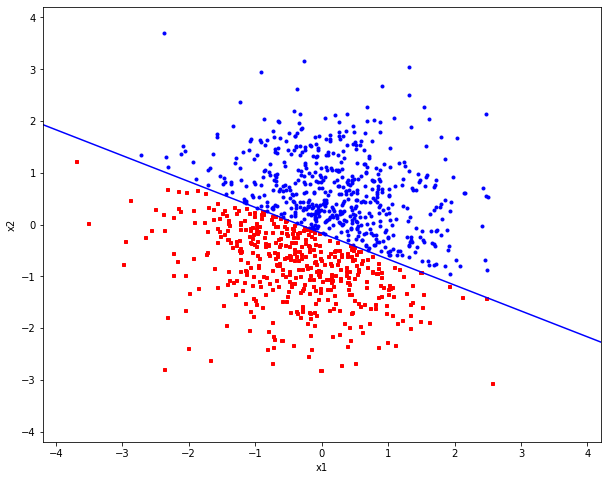

In [ ]:

# Create dataset
X_4 = np.random.randn(1000,2)
X_4 = np.concatenate([np.ones([1000,1]), X_4], axis=1)

# Find y values(class labels) via target function
y_4 = np.sign(np.dot(X_4, predefined_w))

print("\n Data Set Size : 1000 ")
plot_2D_decision_boundary(predefined_w, X_4, y_4)



Train started !
First Iteration Plot, with weights trained :  [1.07       0.65990862 0.15653523]
Original Line : Blue, Trained Line : Red


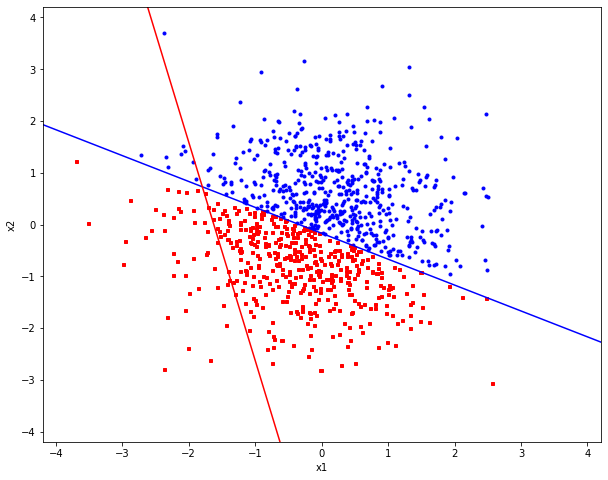

Perceptron algorithm is converged in  54  steps.
Train completed !
Original weigth vector  ( f function ) : [0.1, 0.3, 0.6]
Learned weigth vector ( g function )   :  [ 6.07       17.88398764 36.75690862]
Original Line : Blue, Trained Line : Red


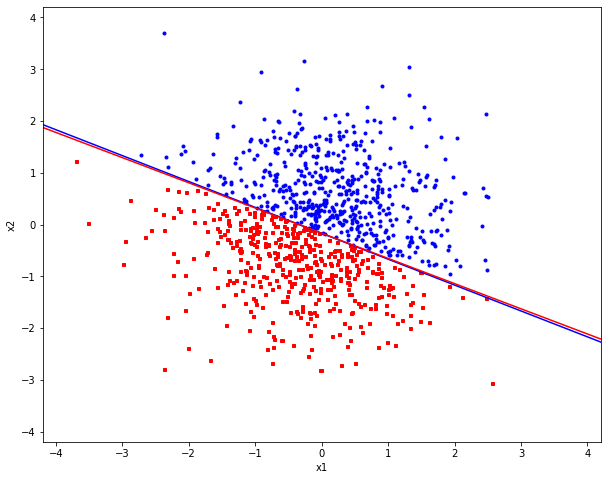

Slope of original line :  0.5
Slope of trained line  :  0.48654765356903423
Difference  :  0.013452346430965767


In [ ]:
# Train perceptron 

print("Train started !")

trained_w = train_perceptron(X_4,y_4)

print("Train completed !")
print("Original weigth vector  ( f function ) :", predefined_w)
print("Learned weigth vector ( g function )   : ", trained_w)

print("Original Line : Blue, Trained Line : Red")
plot_2_line(predefined_w, trained_w, X_4, y_4)


#  show similarity
slope_original = predefined_w[1] / predefined_w[2]

slope_trained = trained_w[1] / trained_w[2]

difference_dimension_1000 = np.absolute(slope_original - slope_trained)

print("Slope of original line : ", slope_original)
print("Slope of trained line  : ", slope_trained)
print("Difference  : ", difference_dimension_1000)


COMMENTS

Two plots could be seen above. The first one is the plot in first iteration. This line does not split the data properly, so in 54th step the data is splitted properly as in seen second plot.

The difference between slope values of two line is 0.013452346430965767. This value lower than the previous one ( data set with size 100 ). Therefore we could say that our model finds closer lines as data size increases. 


Our algorithm converges in 8 steps with data set size 20 and in 15 steps with data set size 100 and 54 steps with data size 1000. So, we could say that, number of iteration to converge would increase as data size increases.

In [ ]:


#-------------------------------------------------------------------------------
# Function for Perceptron Learning Algorithm
# Params:
# X: dataset is a Nx(d+1) matrix, first dimension is 1 for the bias term
# y: output is an N dimensional vector, negative class is denoted by -1 and positive class is denoted by 1
# return:
# w_trained: model is a (d+1) dimensional vector, first dimension is for the bias term

def train_perceptron_for_10_dim(X, y):
        
    # we start with the w values below : 
    w_trained = [0.2,0.2,0.2,0.2,0.1,0.2,0.1,0.3,0.1,0.3,0.5]

    iteration = 0
    is_converged = False
    
    while is_converged is False: 
                
        y_predicted = np.sign(np.dot(X, w_trained))  
                
        equality_of_indices = np.equal(y, y_predicted)
        
        # check indis for random misclassified x
        indices = [i for i in range(len(equality_of_indices)) if equality_of_indices[i] == False]  
        if len(indices) > 0:
            random_misclassified = rnd.randint(0, len(indices)-1)
            w_trained +=  y[random_misclassified]*X[random_misclassified]
            iteration += 1
        else :
            is_converged = True
            print("Perceptron algorithm is converged in " , iteration , " steps.")
             
    return w_trained

In [ ]:

# Create dataset
X_5 = np.random.randn(1000,10)
X_5 = np.concatenate([np.ones([1000,1]), X_5], axis=1)

predefined_w_10 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

# Find y values(class labels) via target function
y_5 = np.sign(np.dot(X_5, predefined_w_10))



In [ ]:
# Train perceptron 

print("Train started !")

trained_w = train_perceptron_for_10_dim(X_5, y_5)

print("Train completed !")
print("Original weigth vector  ( f function ) :", predefined_w_10 )
print("Learned weigth vector ( g function )   : ", trained_w)


Train started !
Perceptron algorithm is converged in  4676  steps.
Train completed !
Original weigth vector  ( f function ) : [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Learned weigth vector ( g function )   :  [1166.2        1882.62807887  533.89634639  636.80062289 1461.83466375
 1014.44659468  481.27516068 1108.04018362 1094.16704476 1287.63106289
 1118.84872773]


COMMENTS

We increase the dimension from 2 to 10. 



As a result : 
    
    We could say that number of iterations increases when data size increase so that the algorithm converges and 
    algorithm find closer lines.
    
    When dimension increases with same data size, number of iteration also increases and algorithm converge takes longer.
    
    Data Size   Dimension       Number of iterations
    20          2               8
    100         2               15
    1000        2               54
    1000        10              4676
